<a href="https://colab.research.google.com/github/asadbek08/DataScienceMohirdev/blob/main/BreastCancerML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Jupyter notebook demonstrates the implementation of a machine learning model to predict breast cancer based on a set of features. The model uses the Wisconsin Breast Cancer Dataset from the UCI Machine Learning Repository.**



In [ ]:
import pandas as pd
import numpy as np

df  = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv")
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
479,911916,M,16.250,19.51,109.80,815.8,0.10260,0.18930,0.223600,0.091940,...,17.39,23.05,122.10,939.7,0.13770,0.44620,0.58970,0.17750,0.3318,0.09136
257,886776,M,15.320,17.27,103.20,713.3,0.13350,0.22840,0.244800,0.124200,...,17.73,22.66,119.80,928.8,0.17650,0.45030,0.44290,0.22290,0.3258,0.11910
464,911320502,B,13.170,18.22,84.28,537.3,0.07466,0.05994,0.048590,0.028700,...,14.90,23.89,95.10,687.6,0.12820,0.19650,0.18760,0.10450,0.2235,0.06925
258,887181,M,15.660,23.20,110.20,773.5,0.11090,0.31140,0.317600,0.137700,...,19.85,31.64,143.70,1226.0,0.15040,0.51720,0.61810,0.24620,0.3277,0.10190
117,864729,M,14.870,16.67,98.64,682.5,0.11620,0.16490,0.169000,0.089230,...,18.81,27.37,127.10,1095.0,0.18780,0.44800,0.47040,0.20270,0.3585,0.10650
374,9013005,B,13.690,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.020310,...,14.84,20.21,99.16,670.6,0.11050,0.20960,0.13460,0.06987,0.3323,0.07701
312,89382602,B,12.760,13.37,82.29,504.1,0.08794,0.07948,0.040520,0.025480,...,14.19,16.40,92.04,618.8,0.11940,0.22080,0.17690,0.08411,0.2564,0.08253
39,855138,M,13.480,20.82,88.40,559.2,0.10160,0.12550,0.106300,0.054390,...,15.53,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.313000,0.043750,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
308,893526,B,13.500,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,...,14.97,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()

df['diagnosis'] = encoder.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [ ]:
df.drop('id', axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
correlate_df = df.corr().abs()
correlate_df.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

***ML Preperation***

In [ ]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=14)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [ ]:
y_predict = knc.predict(X_test)

In [ ]:
new = pd.DataFrame({'real_data' : y_test, 'predicted_data': y_predict})
new.sample(10)

,real_data,predicted_data
316,0,0
101,0,0
86,1,0
500,0,0
7,1,1
487,1,1
547,0,0
504,0,0
540,0,0
361,0,0


In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.7551020408163265

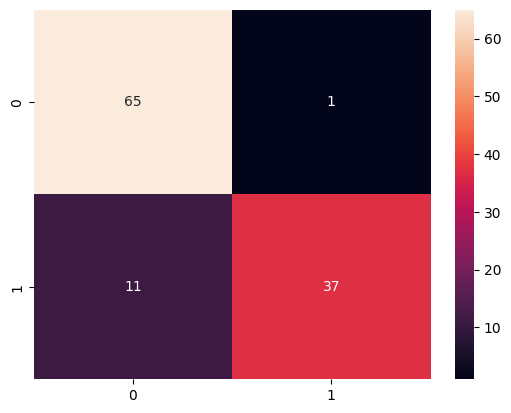

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        66
           1       0.97      0.77      0.86        48

    accuracy                           0.89       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.89      0.89       114



In [ ]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knc, X=X, y=y, cv=5)

from sklearn.metrics import classification_report
print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       357
           1       0.95      0.87      0.91       212

    accuracy                           0.93       569
   macro avg       0.94      0.92      0.93       569
weighted avg       0.94      0.93      0.93       569



In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'n_neighbors' : np.arange(1,25)}
grcv = GridSearchCV(knc, param, cv=5)
grcv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=14),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
grcv.best_params_

{'n_neighbors': 14}

In [ ]:
grcv.best_score_

0.935010091600683